# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/all.csv
- https://github.com/cs109/2015lab1/blob/master/hamlet.txt

We are going to go through the *Lab1-babypython.ipynb* and *Lab1-pythonpandas.ipynb*. The orginal Python notebooks were written in Python 2. We converted the notebooks into Python 3, which can be downloaded from here"

- https://github.com/cis3715-temple-2020/cis3715-temple-2020.github.io/blob/master/Lab3/CIS3715-Lab3.A-babypython_py3.ipynb
- https://github.com/cis3715-temple-2020/cis3715-temple-2020.github.io/blob/master/Lab3/CIS3715-Lab3.A-pythonpandas_py3.ipynb

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*.



**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [1]:
## all imports
from IPython.display import HTML
import numpy as np
import requests
import bs4 # beautiful soup
import time
import operator
import socket
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the user data:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']    # pass in column names for each CSV

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols, engine='python')

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols, engine='python')

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
# Read the movies data
# The movies file contains columns indicating the movie's genres
# Let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), engine='python', encoding = "ISO-8859-1")

movies.head(7)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...


Get information about the data:

In [214]:
print(movies.dtypes)
print()
print(movies.describe())
# *** Why only those two columns? ***
# One represents the dataframe's column name and the other is the object type

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


#### Why only 2 columns show for .describe() method?
Because .describe() returns a statistical summary of each column. If a column is a not of either an integer or float type, then it cannot return a statistical summary for that. 

However, using include="all" option would include some statistical summary for object columns as well. 

In [215]:
movies.describe(include="all")

,movie_id,title,release_date,video_release_date,imdb_url
count,1682.000000,1682,1681,0.0,1679
unique,NaN,1664,240,NaN,1660
top,NaN,"Designated Mourner, The (1997)",01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Fly%20Away%20...
freq,NaN,2,215,NaN,2
mean,841.500000,NaN,NaN,NaN,NaN
std,485.695893,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,421.250000,NaN,NaN,NaN,NaN
50%,841.500000,NaN,NaN,NaN,NaN
75%,1261.750000,NaN,NaN,NaN,NaN


Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [216]:
print(users.head())
print('\n')
print(users['occupation'].head())
print('\n')
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())
print('\n')
print(users.iloc[3])

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object


   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F


user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data:

Select users older than 25

In [217]:
# Extract data within a range
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [218]:
## users aged 40 AND male
# your code here
male_and_40 = users[users["sex"] == "M"][users["age"] == 40]
print(male_and_40.head())

## users who are female and programmers
# your code here
female_programmer = users[users["sex"] == "F"][users["occupation"] == "programmer"]
print(female_programmer.head())

## show statistic summary or compute mean
# your code here
print("For male users at 40")
print(male_and_40.describe())
print("Female programmers")
print(female_programmer.describe())

# computing the mean age of female programmers
print("The mean age of female programmers is: ")
print(np.mean(female_programmer.age))

     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232
199      200   40   M  programmer    93402
283      284   40   M   executive    92629
     user_id  age sex  occupation zip_code
291      292   35   F  programmer    94703
299      300   26   F  programmer    55106
351      352   37   F  programmer    55105
403      404   29   F  programmer    55108
420      421   38   F  programmer    55105
For male users at 40
          user_id   age
count   14.000000  14.0
mean   415.785714  40.0
std    291.416746   0.0
min     19.000000  40.0
25%    221.000000  40.0
50%    333.500000  40.0
75%    626.500000  40.0
max    918.000000  40.0
Female programmers
          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [237]:
print(ratings.head())
## split data per user ID
grouped_data = ratings.groupby('user_id')

## count and combine
ratings_per_user = grouped_data.count()

print(ratings_per_user.head(5))

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
         movie_id  rating  unix_timestamp
user_id                                  
1             272     272             272
2              62      62              62
3              54      54              54
4              24      24              24
5             175     175             175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [244]:
## split data per movie
# your code here
grouped_rating = ratings.groupby('movie_id')

## average and combine
# your code here
average_rating = grouped_rating['rating'].agg('mean')
print("The average rating per movie is", average_rating)

print("The overall average movie rating is, ", np.mean(ratings['rating']))
## get the maximum rating
# your code here
maximum_rating = np.max(average_rating)
print("The maximum averaged rating is \n", maximum_rating)

## get movie ids with that rating
# your code here
max_rate_movies = ratings[ratings['rating'] == maximum_rating]

print("Good movie ids: ",)
## get the movie title
# your code here
print(max_rate_movies['movie_id'])

print("Best movie titles ",)
## get number of ratings per movie
# your code here

# source consulted:
# https://stackoverflow.com/questions/33352280/pandas-boolean-indexing-with-item-in-list-syntax
print(movies.loc[movies['movie_id'].isin(max_rate_movies['movie_id']), 'title'])

print("Best 10 movies are:\n")
print(movies.loc[movies['movie_id'].isin(max_rate_movies['movie_id']), 'title'][:10])

# get number of ratings per movie
print("Number of ratings per movie: ",)

# this works too but gives a little bit of more than
# necessary information
# print(grouped_rating.count())

print(grouped_rating['rating'].agg('count'))


The average rating per movie is movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64
The overall average movie rating is,  3.52986
The maximum averaged rating is 
 5.0
Good movie ids: 
7         465
11       1014
12        222
16        387
26         95
         ... 
99961      91
99962     479
99963     199
99978     975
99996     204
Name: movie_id, Length: 21201, dtype: int64
Best movie titles 
0                                        Toy Story (1995)
1                                        GoldenEye (1995)
2                                       Four Rooms (1995)
3                                       Get Shorty (1995)
4                                          Copycat (1995)
                              ...                        
1638                  Bitter Sugar (Azucar Amargo) (1996)
1641  

**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [221]:
## get the average rating per user
# your code here
grouped_user = ratings.groupby('user_id')
average_rating_user = grouped_user['rating'].agg('mean')
print(average_rating_user)


# list all occupations and if they are male or female dominant
# your code here
total_users = users.shape[0]
m_f_crosstab = pd.crosstab(users['occupation'],users['sex'])
m_f_dominant = m_f_crosstab.copy()

# source consulted
# https://stackoverflow.com/questions/50375985/pandas-add-column-with-value-based-on-condition-based-on-other-columns
m_f_dominant.loc[m_f_dominant['F'] == m_f_dominant['M'], 'dominant_sex'] = 'None'
m_f_dominant.loc[m_f_dominant['F'] > m_f_dominant['M'], 'dominant_sex'] = 'F'
m_f_dominant.loc[m_f_dominant['F'] < m_f_dominant['M'], 'dominant_sex'] = 'M'

# print(m_f_dominant['dominant_sex'])
print(m_f_dominant)

print('number of male users: ')
print(sum(users['sex'] == 'M'))

print('number of female users: ')
print(sum(users['sex'] == 'F'))

user_id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: rating, Length: 943, dtype: float64
sex             F    M dominant_sex
occupation                         
administrator  36   43            M
artist         13   15            M
doctor          0    7            M
educator       26   69            M
engineer        2   65            M
entertainment   2   16            M
executive       3   29            M
healthcare     11    5            F
homemaker       6    1            F
lawyer          2   10            M
librarian      29   22            F
marketing      10   16            M
none            4    5            M
other          36   69            M
programmer      6   60            M
retired         1   13            M
salesman        3    9            M
scientist       3   28            M
student        60  136            M
technician      1 

In [251]:
age_crosstab = users.groupby('occupation').agg('mean')['age']
age_crosstab

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [252]:
np.mean(users['age'])

34.05196182396607

**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


Below is an example for a minimal webpage defined in HTML tags. The root tag is 'html' and then you have the 'head' tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The 'body' tag marks the actual content of the page. You can play around with the 'h2' tag trying different header levels. They range from 1 to 6. 

In [222]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [223]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = requests.get(url).text
print(source)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>		   

<img align="right" src="10.1.jpg" width="250"><br />

<p>[

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

**Answer 5:**
The word 'Alice' is not found in the beautiful soup hompage.

The word 'Soup' occurs 49 times on the site. 
    
The substring 'alien video games' does not have an index because it is not found.

In [224]:
import re
import urllib

## your code here
## is 'Alice' in source?
if re.search('Alice', source):
    print('There is \'Alice\' in the text')
else:
    print('Did not find \'Alice\' in the text')

## count occurences of 'Soup'
print(source.count('Soup'))

## find index of 'alien video games'
print(source.find('alien video games'))

Did not find 'Alice' in the text
49
-1


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [225]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
print("Comparing the 2 print statements")
print(soup)
print(soup.prettify())

# prettify() method gives the HTML structure with all the indentation
# just exactly how one might expect when viewing the HTML source of a webpage
# unlike just printing out the HTML string, which does not have any indentation

## show how to find all a tags
print(soup.findAll('a'))

## ***Why does this not work? ***
# because .findAll specifically looks for HTML tags, not for any particular substring
print(soup.findAll('Soup'))

Comparing the 2 print statements
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="1

More examples:

In [226]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, 
## not all tags in the string
first_tag = soup.find('a')
print(first_tag)

## get attribute `href`
print(first_tag.get('href'))

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
print(link_list)

<a href="#Download">Download</a>
#Download
['#Download', 'bs4/doc/', '#HallOfFame', 'enterprise.html', 'https://code.launchpad.net/beautifulsoup', 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'zine/', 'bs4/download/', 'http://lxml.de/', 'http://code.google.com/p/html5lib/', 'bs4/doc/', 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'https://bugs.launchpad.net/beautifulsoup/', 'https://tidelift.com/security', 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website', 'zine/', None, 'bs4/download/', 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html', 'download/3.x/BeautifulSoup-3.2.2.tar.gz', 'https://tidelift.com/subscription/pkg/pypi-be

In [227]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object is not subscriptable

In [228]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements! Let's verify:
print(sum([l is None for l in link_list]))

# So there are two elements in the list that are None!

2


In [229]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [230]:
# we can put this in a list comprehension as well, 
# it almost reads like a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f

Parsing the Tree:

In [158]:
# redefining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

This is a title Test Hello world!


**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [231]:
## your code here
## get h3 tag from body
root_soup = soup.html
head_soup = soup.contents[0]
body_soup = soup.contents[1]
tags = body_soup.findAll('h3')

## use ul as entry point
ul_entry_pt = soup.find('ul')
all_li = ul_entry_pt.findAll('li')

## get hall of fame list from entry point
## skip the first entry 
hall_of_fame = []
for i in range(1, len(all_li)):
    hall_of_fame.append(str(all_li[i]))
    
print(hall_of_fame)

## reformat into a list containing strings
## it is ok to have a list of lists


['<li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse\na page that\'s been linked to and find a representative image</a>.\n\n</li>', '<li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business\n activities</a> of an arms merchant.\n\n</li>', '<li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python\nbug tracker from Sourceforge to Roundup</a>.\n\n</li>', '<li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>\nuses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather\nstatewide election results</a>.\n\n</li>', '<li>The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA\'s Forecast\nApplications Branch</a> uses Beautiful Soup in <a href="http://laps.noaa.gov/topograbber/">TopoGrabber</a>, a script for\ndownload

`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [232]:
tmp = hall_of_fame
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print('\n'.join(test))

<li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.

</li>
<li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

</li>
<li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

</li>
<li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.

</li>
<li>The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA's Forecast
Applications Branch</a> uses Beautiful Soup in <a href="http://laps.noaa.gov/topograbber/">TopoGrabber</a>, a script for
downloading "high resolution USGS datas

**Question 7**:
- Explain in detail what is Python doing in the previous line

**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

**Answer 7:** For the second line, this is a list comprehension. The list comprehension command looks through each sublist and in each sublist is a string, essentially, these strings are joined together so in the end, we would have an array of joined substrings.

Then the third line just joins all the lines together with the endline character so when we print it out, each string gets its own line.

**Answer 8**

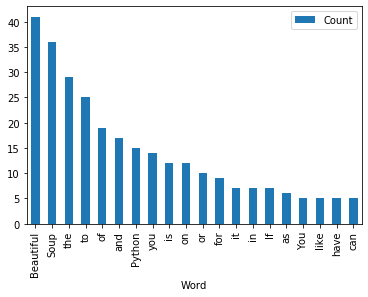

In [233]:
from collections import Counter
import re

INVISIBLE_ELEMS = ('style', 'script', 'head', 'title')
RE_SPACES = re.compile(r'\s{3,}')

def visible_texts(soup):
    """ get visible text from a document """
    text = ' '.join([
        s for s in soup.strings
        if s.parent.name not in INVISIBLE_ELEMS
    ])
    # collapse multiple spaces to two spaces.
    return RE_SPACES.sub('  ', text)

def all_html(soup):
    """ get all text from a document """
    text = ' '.join([
        s for s in soup.strings
    ])
    # collapse multiple spaces to two spaces.
    return RE_SPACES.sub('  ', text)


def plot_common_words(myStr, num_words):
    
    # to replace all the punctuations
    for word in myStr.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        word = word.replace('|',"")
        word = word.replace("{","")
        word = word.replace("}","")
    
    # implementing Counter
    myDict = Counter(myStr.split())

    # sorting myDict based on each key's value in ascending order
    myDict = {k: v for k, v in sorted(myDict.items(), key=lambda item: item[1], reverse=True)}

    # because Counter also counts individual character like 'e' as well!!!
    # We need to filter those out!
    myDict = {k: v for k, v in myDict.items() if v > 1 and len(k) > 1}
    
    top_n_dict = {}
    count = num_words
    for k, v in myDict.items():
        
        if count == 0:
            break
        
        # only get top num_words entries
        top_n_dict[k] = v
        count -= 1
        
    # to convert dictionary in which each key is a value to a col
    # and its corresponding value is another value to another col
    # to pandas frame
    # must use .items()
    df = pd.DataFrame(top_n_dict.items(), columns = ['Word', 'Count'])
    df.plot.bar(x='Word',y='Count')
    
#Plot a histogram of the count of the 20 most common words in the html file
# the same effect occurs for myStr = soup.text as well
myStr = all_html(soup)
plot_common_words(myStr, 20)

In [234]:
print(body_soup.text)




Beautiful Soup: We called him Tortoise because he taught us.








#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}


[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beauti

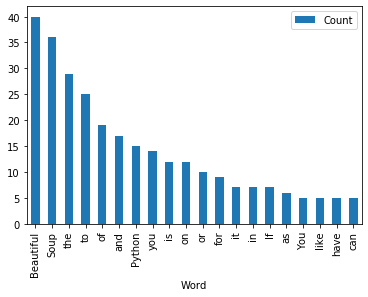

In [235]:
# find the 20 most common words in the visible part of the HTML file
myStr = visible_texts(soup)
plot_common_words(myStr, 20)